In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

In [2]:

dir = '/mnt/data/Public_datasets/nuScenes/samples/LIDAR_TOP'

all_dist = []
files = os.listdir(dir)
random.shuffle(files)

for file in files[:2000]:
    arr = np.fromfile(os.path.join(dir,file), dtype=np.float32).reshape(-1,5)
    xyz = arr[:,:3]
    dist = np.linalg.norm(xyz,axis=1)
    all_dist += dist.tolist()

In [3]:
data = np.array(all_dist)
data = data[np.where(data>2)]
data = data[np.where(data<70)]
data = np.array(random.sample(list(data), 1000000))

""" data = np.random.uniform(1,6,100000)
data = 4**data*np.e**(-4)/np.math.factorial(data) """

' data = np.random.uniform(1,6,100000)\ndata = 4**data*np.e**(-4)/np.math.factorial(data) '

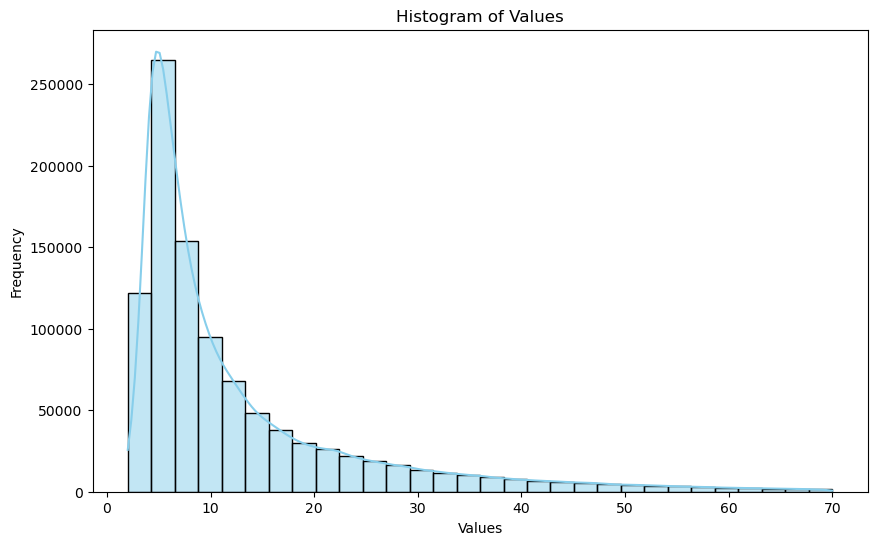

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

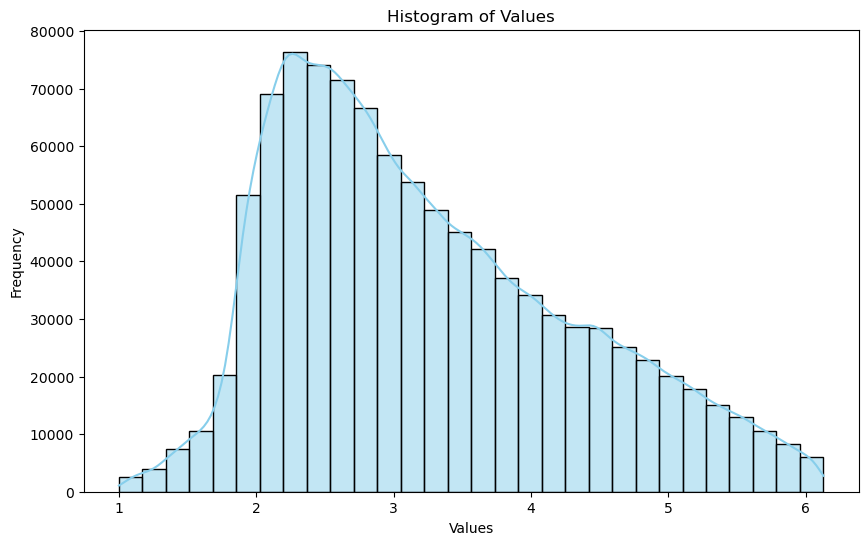

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log2(data), bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [6]:
dir = 'LiDAR_Tokenizer/data/npz'

all_dist = []
files = os.listdir(dir)
random.shuffle(files)

for file in files[:100]:
    rawdata = np.load(os.path.join(dir,file))['point_cloud']

    channels = [2,3,4,5,6,7]

    all_points = []
    for i,channel in enumerate(channels):
        data_channel = rawdata[np.where(rawdata[:,4] == channel)]

        pcd = data_channel[:,:3]
        all_points.append(pcd)

    xyz = np.vstack(all_points)

    dist = np.linalg.norm(xyz,axis=1)
    all_dist += dist.tolist()

In [15]:
data2 = np.array(all_dist)
data2 = data2[np.where(data2>3.7)]
data2 = data2[np.where(data2<200)]
data2 = np.array(random.sample(list(data2), 2000000))

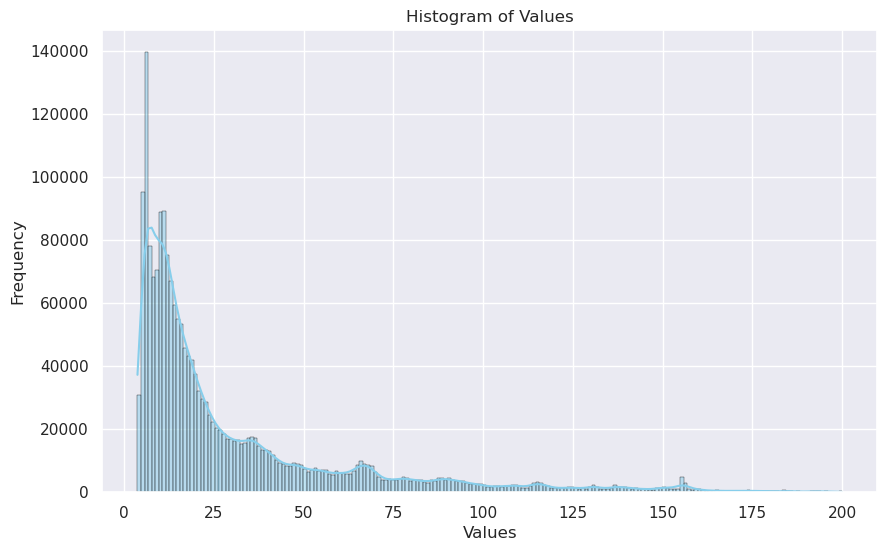

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data2, bins=200, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

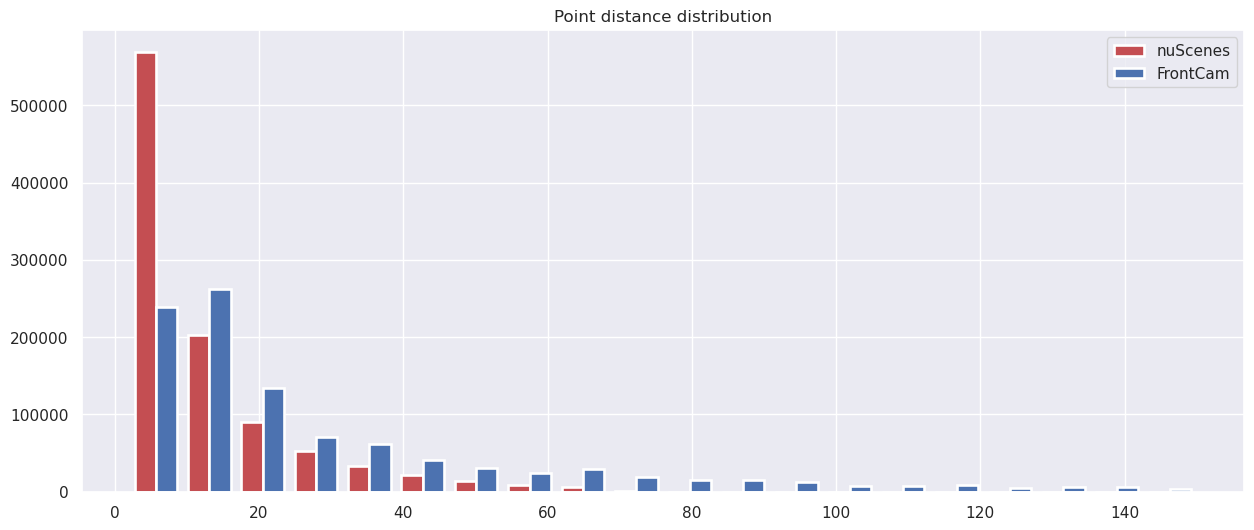

In [9]:
sns.set_theme() 
plt.figure(figsize=(15, 6))  
plt.hist([data, data2], color=['r', 'b'], alpha=1, bins=20, label=['nuScenes', 'FrontCam'], linewidth=1.9)
plt.title("Point distance distribution")
plt.legend()
plt.show()

(array([[  669.,   951.,  1227.,  1218.,  1447.,  2183.,  2486.,  3002.,
          3489.,  3767.,  4264.,  5381.,  7094., 11606., 17342., 19992.,
         22544., 24291., 26292., 28291., 28281., 27124., 26580., 27336.,
         26929., 26631., 25599., 25347., 23952., 24189., 22126., 21828.,
         20119., 20209., 19588., 18538., 18341., 17547., 16774., 16592.,
         16280., 15915., 15569., 14671., 14102., 13323., 12808., 12703.,
         12250., 11843., 11216., 10883., 10400., 10462., 10358., 10935.,
         10126.,  9669.,  9180.,  9068.,  8694.,  8654.,  8002.,  7637.,
          7303.,  7112.,  6774.,  6304.,  6000.,  5591.,  5344.,  5022.,
          4891.,  4574.,  4061.,  3908.,  3513.,  3322.,  2872.,  2490.,
          2366.,  2047.,   592.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         

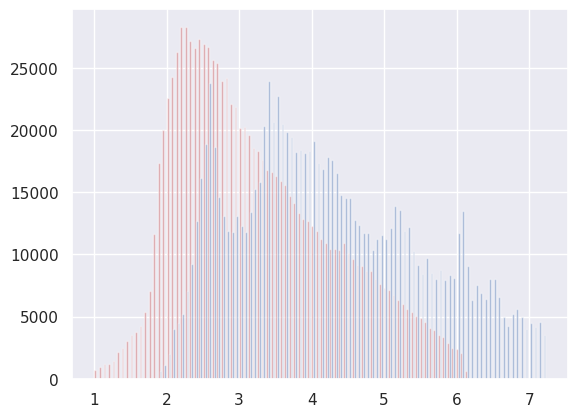

In [10]:
plt.hist([np.log2(data), np.log2(data2)], color=['r','b'], alpha=0.5, bins=100)